## Neste tutorial eu exercitei a Análise de Componentes Principais( Principal Component Analysis - PCA). A Análise de Componentes Principais converte um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas.



---



---



Importanto pacotes básicos

In [0]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from sklearn.datasets import load_breast_cancer

In [125]:
#Carregando o dataset e explorando
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_data.shape

(569, 30)

In [0]:
cancer_labels = cancer.target

In [127]:
cancer_labels.shape

(569,)

In [0]:
labels = np.reshape(cancer_labels,(569,1))

In [0]:
cancer_final = np.concatenate([cancer_data,labels],axis=1)

In [130]:
cancer_final.shape

(569, 31)

In [0]:
cancer_dataset = pd.DataFrame(cancer_final)

In [132]:
#adicionando os nomes das features
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
features_labels = np.append(features,'label')

In [134]:
cancer_dataset.columns = features_labels

cancer_dataset.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


In [0]:
#substituindo 0 e 1 por benigno e maligno
cancer_dataset['label'].replace(0, 'Benigno',inplace=True)
cancer_dataset['label'].replace(1, 'Maligno',inplace=True)

In [140]:
cancer_dataset.tail(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400,Benigno
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039,Maligno


In [0]:
cancer_dataset1 = cancer_dataset

In [142]:
cancer_dataset1.tail(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.265,0.4087,0.12400,Benigno
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.000,0.2871,0.07039,Maligno




---



---



In [144]:
#normalizando os dados
from sklearn.preprocessing import StandardScaler
x = cancer_dataset1.loc[:, features].values
x = StandardScaler().fit_transform(x) 
x.shape

(569, 30)

In [145]:
#verificando média e desvio padrão
np.mean(x),np.std(x)


(-6.826538293184326e-17, 1.0)

In [0]:
#convertendo features normalizadas para dados tabulares
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [147]:
cancer_normalizado = pd.DataFrame(x,columns=feat_cols)
cancer_normalizado.tail(2)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [0]:
#Criando os componentes principais(2) a partir dos 30 do dataset 
from sklearn.decomposition import PCA
pca_cancer = PCA(n_components=2)
cancer_princ_comp = pca_cancer.fit_transform(x)

In [149]:
cancer_princ_comp_final = pd.DataFrame(data = cancer_princ_comp, columns = ['componente principal 1', 'componente principal 2'])
print('Variância explicada por cada componente: {}'.format(pca_cancer.explained_variance_ratio_))
cancer_princ_comp_final.tail(2)

Variância explicada por cada componente: [0.44272026 0.18971182]


,componente principal 1,componente principal 2
567,10.374794,1.672010
568,-5.475243,-0.670637


<Figure size 432x288 with 0 Axes>

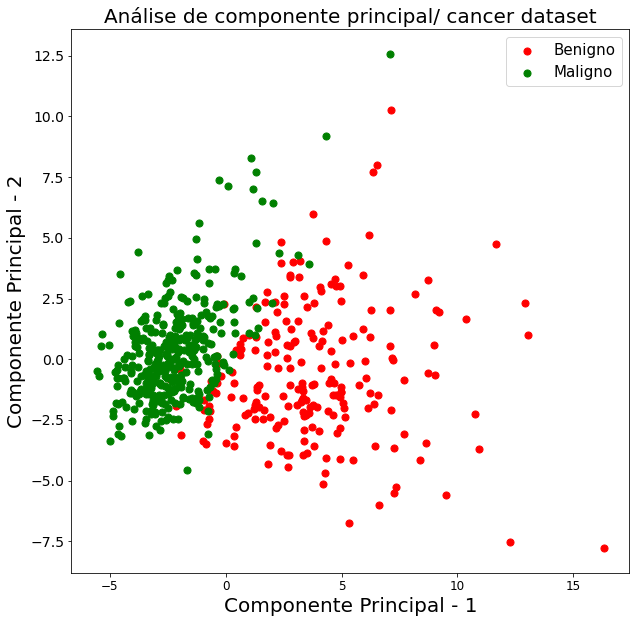

In [150]:
#plotando os dados
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Componente Principal - 1',fontsize=20)
plt.ylabel('Componente Principal - 2',fontsize=20)
plt.title("Análise de componente principal/ cancer dataset",fontsize=20)
targets = ['Benigno', 'Maligno']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = cancer_dataset['label'] == target
    plt.scatter(cancer_princ_comp_final.loc[indicesToKeep, 'componente principal 1'],
               cancer_princ_comp_final.loc[indicesToKeep, 'componente principal 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Pelo gráfico pode-se notar que as duas classes podem ser linearmente separáveis e que a classe benigna está mais dispersa em comparação com a classe maligna.
